Import everything possibly needed - taken from [data viz workshop](https://programming-workshops.readthedocs.io/en/latest/workshops/05_visualization/intro.html#data-frames)

In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import dexplot as dxp
sns.set_theme(style="whitegrid")

[Guide for making subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)

Good explanation of fig,ax,plt [here](https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9)

 - shows you how to access ax object with seaborn [here](https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface)

Using matplot lib with seaborn and with  adjustment of spacing for multiple bar subplots

NameError: name 'data' is not defined

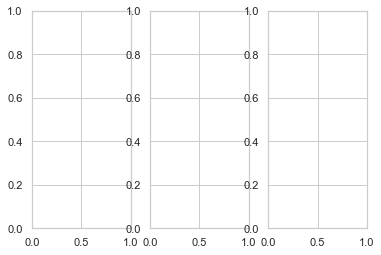

In [47]:
fig,(ax1,ax2,ax3) =plt.subplots(1,3)
sns.barplot(x="format", y="numVNTRs", data=data,ax=ax1)
sns.barplot(x="format", y="numreads", data=data, ax=ax2)
sns.barplot(x="format", y="time (min)", data=data, ax=ax3)
#adjust overlapping x axis tick labels
plt.setp(ax1.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.setp(ax2.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.setp(ax3.get_xticklabels(), rotation=50, horizontalalignment='right')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)



Time: User time, wallclock, CPU time  

ALL RUNS:  

1 Fastq
  
4 BWA_bam
 - unfiltered  (full)
 - overlaps
 - unmapped
 - overlaps+unmapped
 
6 db_bam
 - unfiltered (full)
 - overlaps
 - unmapped
 - alternate chromosomes
 - overlaps+unmapped
 - overlaps+unmapped+alternate chromosomes - should include the same num reads or more as BWA_bam overlaps+unmapped  
 ----
 11 total rows in complete VNTRseek run table presented

Load run_comparison_results.csv - all data is based off this file

In [48]:
master = pd.read_csv("run_comparison_results.csv", index_col=False)
master.head()


,Genome,Source,ReferenceGenome,Dataset,Input_directory,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,...,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
0,NA18545,Fastq,-1,unfiltered,NYGC_na18545/practice_na18545,7155775,6:05:34:38,7:34:12,01:03:54:41,6:13:08:51,...,2366.0,2366.0,0.0,1710.0,1710.0,-1.0,1710.0,0.0,0.0,1710.0
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,NYGC_na18545/full_bam_test,7323341,5:11:19:07,7:53:33,01:16:54:29,5:19:12:41,...,2357.0,2357.0,0.0,1708.0,1708.0,-1.0,1708.0,0.0,0.0,1708.0
2,NA18545,Fastq to BWA to BAM,GRCh38.fa,unmapped,NYGC_na18545/unmappedVNTRtest,7245806,1:49:20,0:01:05,00:00:46:18,1:50:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,NYGC_na18545/primaryoverlaps_VNTRtest,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37,...,2223.0,2148.0,75.0,1686.0,1682.0,4.0,1674.0,8.0,2.0,1680.0
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,NYGC_na18545/primaryoverlaps_unmapped_VNTRtest,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14,...,2222.0,2156.0,66.0,1685.0,1682.0,3.0,1675.0,7.0,1.0,1681.0


Function to convert CPU_time to CPU_minutes

In [49]:
def time_to_minutes(string_time):
    listtime=string_time.split(":")
    days=0
    minutes=0
    hours=0
    seconds=0
    if (len(listtime)==4):
        days = int(listtime[0])
        listtime.pop(0)
    if (len(listtime)>=3):
        hours = days*24+int(listtime[0])
        listtime.pop(0)
    if (len(listtime)>=2):
        minutes = hours*60+int(listtime[0])
        listtime.pop(0)
        decimalsec= float(listtime[0])/60
        listtime.pop(0)
        minutes=round(minutes+decimalsec,1)
    return minutes


Convert, add extra column in dataframe, check everything looks good

In [50]:
master['CPU_minutes']=master['CPU_time'].map(lambda time: time_to_minutes(str(time))) #only adds column to dataframe
master.head()
#display(master)


,Genome,Source,ReferenceGenome,Dataset,Input_directory,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,...,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt,CPU_minutes
0,NA18545,Fastq,-1,unfiltered,NYGC_na18545/practice_na18545,7155775,6:05:34:38,7:34:12,01:03:54:41,6:13:08:51,...,2366.0,0.0,1710.0,1710.0,-1.0,1710.0,0.0,0.0,1710.0,9428.9
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,NYGC_na18545/full_bam_test,7323341,5:11:19:07,7:53:33,01:16:54:29,5:19:12:41,...,2357.0,0.0,1708.0,1708.0,-1.0,1708.0,0.0,0.0,1708.0,8352.7
2,NA18545,Fastq to BWA to BAM,GRCh38.fa,unmapped,NYGC_na18545/unmappedVNTRtest,7245806,1:49:20,0:01:05,00:00:46:18,1:50:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.4
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,NYGC_na18545/primaryoverlaps_VNTRtest,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37,...,2148.0,75.0,1686.0,1682.0,4.0,1674.0,8.0,2.0,1680.0,788.6
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,NYGC_na18545/primaryoverlaps_unmapped_VNTRtest,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14,...,2156.0,66.0,1685.0,1682.0,3.0,1675.0,7.0,1.0,1681.0,1098.2


Export as a csv to save CPU_time conversion

In [51]:
master.to_csv('run_comparison_results_time.csv',index=False)

Read in csv file I just made to make my own subset of data for NA18545

In [52]:
master_time= pd.read_csv("run_comparison_results_time.csv", index_col=False)

#get the rows of data that we will be comparing
master_NA18545 = master_time[(master_time.Genome == "NA18545")& (master_time.Dataset != 'unmapped')& (master_time.Dataset !='alt')]

#Keep only cols we will use
graph_NA18545= pd.concat([master_NA18545.Genome, master_NA18545.Source, master_NA18545.ReferenceGenome, master_NA18545.Dataset, master_NA18545.CPU_minutes, master_NA18545.numreads, master_NA18545.numVNTRs_py, master_NA18545.numVNTRsmatching, master_NA18545.numVNTRsmatching_identical,master_NA18545.numVNTRsmatching_nonidentical,master_NA18545.numsingletons,master_NA18545.numsingletonsmatching, master_NA18545.numsingletonsmissingfromfull, master_NA18545.singletonsmatching_identical, master_NA18545.singletonsmatching_nonidentical,master_NA18545.singletonsmatching_nonidentical_changedgt,master_NA18545.numsingletonsmatching_identicalgt],axis=1) 
##Can also drop columns if its more succinct 
#graph_NA18545=master_NA18545.drop([colnames], axis=1)

display(graph_NA18545)
graph_NA18545.to_csv('graph_NA18545.csv',index=False)

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
0,NA18545,Fastq,-1,unfiltered,9428.9,789526334.0,2366.0,2366.0,2366.0,0.0,1710.0,1710.0,-1.0,1710.0,0.0,0.0,1710.0
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,8352.7,789526334.0,2357.0,2357.0,2357.0,0.0,1708.0,1708.0,-1.0,1708.0,0.0,0.0,1708.0
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,788.6,15779667.0,2235.0,2223.0,2148.0,75.0,1686.0,1682.0,4.0,1674.0,8.0,2.0,1680.0
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,1098.2,17825931.0,2238.0,2222.0,2156.0,66.0,1685.0,1682.0,3.0,1675.0,7.0,1.0,1681.0
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9240.7,789526334.0,2362.0,2362.0,2362.0,0.0,1711.0,1711.0,-1.0,1711.0,0.0,0.0,1711.0
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,833.3,14810544.0,2214.0,2208.0,2144.0,64.0,1682.0,1682.0,0.0,1678.0,4.0,1.0,1681.0
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,929.5,15684155.0,2217.0,2207.0,2146.0,61.0,1682.0,1682.0,0.0,1677.0,5.0,1.0,1681.0
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,1393.8,27048435.0,2244.0,2234.0,2171.0,63.0,1689.0,1689.0,0.0,1681.0,8.0,2.0,1687.0


Make my own subset for HG00096

In [53]:
#get the rows
master_HG00096 = master_time[(master_time.Genome == "HG00096")& (master_time.Dataset != 'unmapped')&(master_time.Dataset !='alt')]

#Keep only cols we will used
graph_HG00096= pd.concat([master_HG00096.Genome, master_HG00096.Source, master_HG00096.ReferenceGenome, master_HG00096.Dataset, master_HG00096.CPU_minutes, master_HG00096.numreads, master_HG00096.numVNTRs_py, master_HG00096.numVNTRsmatching, master_HG00096.numVNTRsmatching_identical,master_HG00096.numVNTRsmatching_nonidentical,master_HG00096.numsingletons,master_HG00096.numsingletonsmatching, master_HG00096.numsingletonsmissingfromfull, master_HG00096.singletonsmatching_identical, master_HG00096.singletonsmatching_nonidentical,master_HG00096.singletonsmatching_nonidentical_changedgt,master_HG00096.numsingletonsmatching_identicalgt],axis=1) 

display(graph_HG00096)
graph_HG00096.to_csv('graph_HG00096.csv',index=False)

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
11,HG00096,Fastq,-1,unfiltered,0.0,768049130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9191.4,768049130.0,2299.0,2299.0,2299.0,0.0,1688.0,1688.0,-1.0,1688.0,0.0,0.0,1688.0
14,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,810.8,14519477.0,2173.0,2164.0,2086.0,78.0,1666.0,1664.0,24.0,1654.0,10.0,2.0,1662.0
16,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,936.1,15405622.0,2175.0,2166.0,2085.0,81.0,1666.0,1665.0,23.0,1655.0,10.0,1.0,1664.0
17,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,1291.0,25840667.0,2202.0,2192.0,2100.0,92.0,1676.0,1674.0,2.0,1658.0,16.0,3.0,1671.0


__Now work with data from graph_NA18545__

Subset bwa data from db data, for separate plots

In [54]:
bwa_NA18545=graph_NA18545[graph_NA18545.ReferenceGenome=="GRCh38.fa"]
bwa_NA18545.head()

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,8352.7,789526334.0,2357.0,2357.0,2357.0,0.0,1708.0,1708.0,-1.0,1708.0,0.0,0.0,1708.0
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,788.6,15779667.0,2235.0,2223.0,2148.0,75.0,1686.0,1682.0,4.0,1674.0,8.0,2.0,1680.0
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,1098.2,17825931.0,2238.0,2222.0,2156.0,66.0,1685.0,1682.0,3.0,1675.0,7.0,1.0,1681.0


In [55]:
db_NA18545=graph_NA18545[graph_NA18545.ReferenceGenome=="GRCh38_full_analysis_set_plus_decoy_hla.fa"]
db_NA18545.head()

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9240.7,789526334.0,2362.0,2362.0,2362.0,0.0,1711.0,1711.0,-1.0,1711.0,0.0,0.0,1711.0
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,833.3,14810544.0,2214.0,2208.0,2144.0,64.0,1682.0,1682.0,0.0,1678.0,4.0,1.0,1681.0
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,929.5,15684155.0,2217.0,2207.0,2146.0,61.0,1682.0,1682.0,0.0,1677.0,5.0,1.0,1681.0
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,1393.8,27048435.0,2244.0,2234.0,2171.0,63.0,1689.0,1689.0,0.0,1681.0,8.0,2.0,1687.0


### LINE CHARTS

#### Make sure that I'm plotting the number of SAME VNTRs found - see drawing (not just total numbers)

#### Percent of VNTRs retained from original unrestricted datset and lost from original dataset
 - Plot 1: GRCh38.fa as ref genome
 - Plot 2: GRCh38_full_analysis_set_plus_decoy_hla.fa as ref genome

**Plot 1: GRCh38.fa as mapping reference genome**

Calculate perecentages and place values to plot in dataframe

In [56]:
def get_percentage(num, total):
    percent=(num/total)*100
    return percent

#create a new data frame with values to plot
plot_data= pd.concat([bwa_NA18545.Genome, bwa_NA18545.Dataset, bwa_NA18545.ReferenceGenome],axis=1)

#for all VNTRS
fullnumVNTRs = bwa_NA18545.loc[bwa_NA18545['Dataset']=='unfiltered','numVNTRs_py'].values[0]
plot_data['Percent VNTRs found']=bwa_NA18545['numVNTRsmatching'].map(lambda n:get_percentage(n,int(fullnumVNTRs)))
#plot_data['Percent VNTRs not detected']=my_bam_data['numVNTRsmatching'].map(lambda n:get_percentage((fullnumVNTRs-n),fullnumVNTRs))
display(plot_data)

#for matching singletons VNTRs only
fullnumsingletons = bwa_NA18545.loc[bwa_NA18545['Dataset']=='unfiltered','numsingletons'].values[0]
plot_data['Percent singleton VNTRs found']=bwa_NA18545['numsingletonsmatching'].map(lambda n:get_percentage(n,int(fullnumsingletons)))
#plot_data['Percent singleton VNTRs not detected']=my_bam_data['numsingletonsmatching'].map(lambda n:get_percentage((fullnumsingletons-n),fullnumsingletons))
display(plot_data)

#for matching singleton VNTRs that have identical genotype
fullnumsingletons_gt= bwa_NA18545.loc[bwa_NA18545['Dataset']=='unfiltered','numsingletonsmatching_identicalgt'].values[0]
plot_data['Percent singleton VNTRs found with identical GTs']=bwa_NA18545['numsingletonsmatching_identicalgt'].map(lambda n:get_percentage(n,int(fullnumsingletons_gt)))
#plot_data['Percent singleton VNTRs not found with identical GTs']=my_bam_data['numsingletonsmatching_identicalgt'].map(lambda n:get_percentage((fullnumsingletons_gt-n),fullnumsingletons_gt))
display(plot_data)


,Genome,Dataset,ReferenceGenome,Percent VNTRs found
1,NA18545,unfiltered,GRCh38.fa,100.000000
3,NA18545,TRoverlaps,GRCh38.fa,94.314807
4,NA18545,TRoverlaps+unmapped,GRCh38.fa,94.272380


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found
1,NA18545,unfiltered,GRCh38.fa,100.000000,100.000000
3,NA18545,TRoverlaps,GRCh38.fa,94.314807,98.477752
4,NA18545,TRoverlaps+unmapped,GRCh38.fa,94.272380,98.477752


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs
1,NA18545,unfiltered,GRCh38.fa,100.000000,100.000000,100.000000
3,NA18545,TRoverlaps,GRCh38.fa,94.314807,98.477752,98.360656
4,NA18545,TRoverlaps+unmapped,GRCh38.fa,94.272380,98.477752,98.419204


Plot percentages of total num VNTRs found, singletons, and singletons with matching GT (for all classes, including full/unfiltered)

[None, None, None, None, None, None]

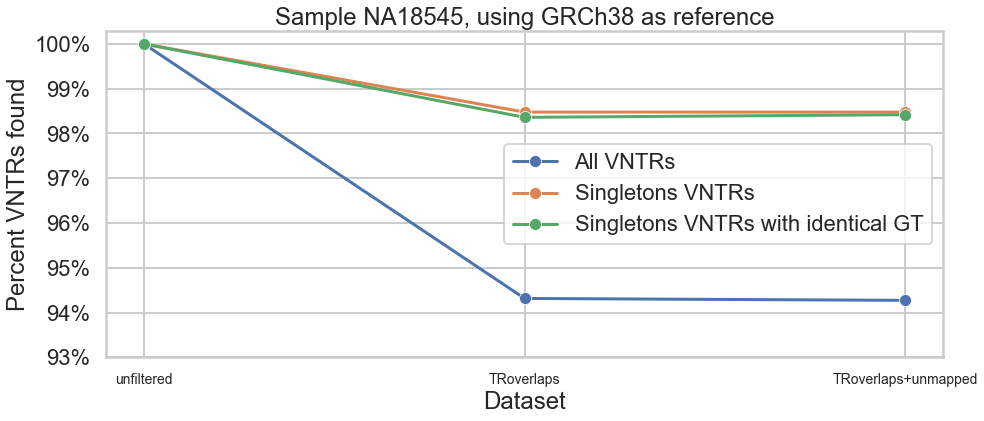

In [81]:
sns.set_context("poster") #/notebook/talk) - I used custom settings
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="Dataset", y="Percent VNTRs found", data=plot_data, ci=None, marker='o',label="All VNTRs")
sns.lineplot(x="Dataset", y="Percent singleton VNTRs found", data=plot_data, ci=None, marker='o',label="Singletons VNTRs")
sns.lineplot(x="Dataset", y="Percent singleton VNTRs found with identical GTs", data=plot_data, ci=None, marker='o',label="Singletons VNTRs with identical GT")
ax.set_title("Sample NA18545, using GRCh38 as reference")
# plt.xlabel("Dataset") #fontsize=15
# plt.ylabel("Percent VNTRs found") #, fontsize=15
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.yticks(np.arange(round(min(plot_data["Percent VNTRs found"]))-1,100.5 , 1)) #round(max(plot_data["Percent singleton VNTRs found"]))+1
ax.legend(ncol=1, loc="right", frameon=True) #, fontsize=12

#sns.set_theme() ##to reset
#sns.set_theme(style="whitegrid")
# sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 2.5})
plt.setp(ax.get_xticklabels(), fontsize=14) #, horizontalalignment='right'
#plt.setp(ax.get_yticklabels(), fontsize=15)


##GET minor gridlines (doesn't look good)
#ax.get_xaxis().set_minor_locator(mtick.AutoMinorLocator())
#ax.get_yaxis().set_minor_locator(mtick.AutoMinorLocator())
# ax.grid(b=True, which='major', color='grey', linewidth=1.0)
#ax.grid(b=True, which='minor', color='grey', linewidth=0.5)

Try using dexplot for the same visualization

In [58]:
to_melt_NA18545=pd.melt(plot_data, id_vars=['Genome', 'Dataset', 'ReferenceGenome'], value_vars=['Percent VNTRs found', 'Percent singleton VNTRs found', 'Percent singleton VNTRs found with identical GTs'],
var_name='Percent Type', value_name='Percent')
display(to_melt_NA18545)

,Genome,Dataset,ReferenceGenome,Percent Type,Percent
0,NA18545,unfiltered,GRCh38.fa,Percent VNTRs found,100.000000
1,NA18545,TRoverlaps,GRCh38.fa,Percent VNTRs found,94.314807
2,NA18545,TRoverlaps+unmapped,GRCh38.fa,Percent VNTRs found,94.272380
3,NA18545,unfiltered,GRCh38.fa,Percent singleton VNTRs found,100.000000
4,NA18545,TRoverlaps,GRCh38.fa,Percent singleton VNTRs found,98.477752
5,NA18545,TRoverlaps+unmapped,GRCh38.fa,Percent singleton VNTRs found,98.477752
6,NA18545,unfiltered,GRCh38.fa,Percent singleton VNTRs found with identical GTs,100.000000
7,NA18545,TRoverlaps,GRCh38.fa,Percent singleton VNTRs found with identical GTs,98.360656
8,NA18545,TRoverlaps+unmapped,GRCh38.fa,Percent singleton VNTRs found with identical GTs,98.419204


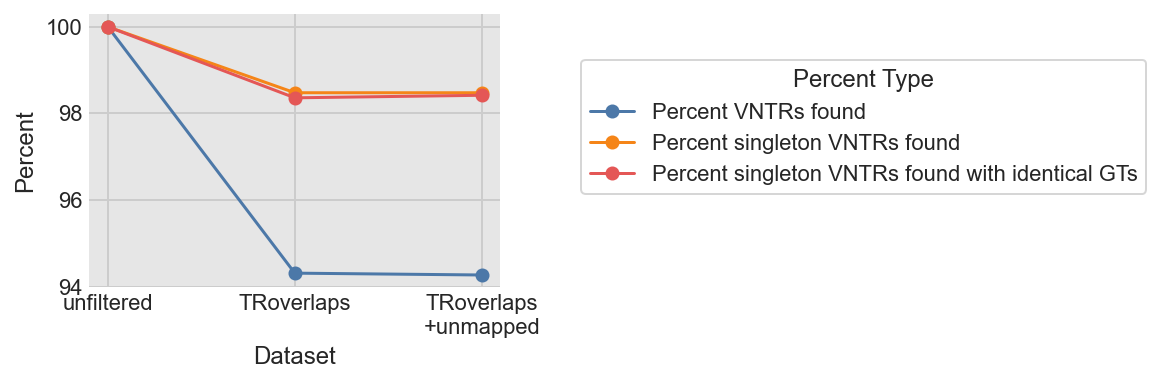

In [59]:
sns.set_context("notebook")
dxp.line(x='Dataset', y='Percent', data=to_melt_NA18545, aggfunc='median', split='Percent Type', x_order=['unfiltered', 'TRoverlaps', 'TRoverlaps+unmapped'])

#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

** Drawbacks are that you can't 'hack' into functions/customize as much as matplotlib - there's no changing labels or formatting

**Plot 2: GRCh38_full_analysis_set_plus_decoy_hla.fa as mapping reference genome**

Calculate percentages and place values in to plot in 'plot_data2' dataframe

In [60]:
#create a new data from with values to plot for db data
plot_data2= pd.concat([db_NA18545.Genome, db_NA18545.Dataset,db_NA18545.ReferenceGenome],axis=1)

#View original values to make sure number makes sense
display(db_NA18545)

#for all VNTRS
fullnumVNTRs = db_NA18545.loc[db_NA18545['Dataset']=='unfiltered','numVNTRs_py'].values[0]
plot_data2['Percent VNTRs found']=db_NA18545['numVNTRsmatching'].map(lambda n:get_percentage(n,int(fullnumVNTRs)))
#plot_data['Percent VNTRs not detected']=db_bam_data['numVNTRsmatching'].map(lambda n:get_percentage((fullnumVNTRs-n),fullnumVNTRs))
display(plot_data2)

#for matching singletons VNTRs only
fullnumsingletons = db_NA18545.loc[db_NA18545['Dataset']=='unfiltered','numsingletons'].values[0]
plot_data2['Percent singleton VNTRs found']=db_NA18545['numsingletonsmatching'].map(lambda n:get_percentage(n,int(fullnumsingletons)))
#plot_data['Percent singleton VNTRs not detected']=db_bam_data['numsingletonsmatching'].map(lambda n:get_percentage((fullnumsingletons-n),fullnumsingletons))
display(plot_data2)

#for matching singleton VNTRs that have identical genotype
fullnumsingletons_gt= db_NA18545.loc[db_NA18545['Dataset']=='unfiltered','numsingletonsmatching_identicalgt'].values[0]
plot_data2['Percent singleton VNTRs found with identical GTs']=db_NA18545['numsingletonsmatching_identicalgt'].map(lambda n:get_percentage(n,int(fullnumsingletons_gt)))
#plot_data['Percent singleton VNTRs not found with identical GTs']=db_bam_data['numsingletonsmatching_identicalgt'].map(lambda n:get_percentage((fullnumsingletons_gt-n),fullnumsingletons_gt))
display(plot_data2)


,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9240.7,789526334.0,2362.0,2362.0,2362.0,0.0,1711.0,1711.0,-1.0,1711.0,0.0,0.0,1711.0
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,833.3,14810544.0,2214.0,2208.0,2144.0,64.0,1682.0,1682.0,0.0,1678.0,4.0,1.0,1681.0
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,929.5,15684155.0,2217.0,2207.0,2146.0,61.0,1682.0,1682.0,0.0,1677.0,5.0,1.0,1681.0
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,1393.8,27048435.0,2244.0,2234.0,2171.0,63.0,1689.0,1689.0,0.0,1681.0,8.0,2.0,1687.0


,Genome,Dataset,ReferenceGenome,Percent VNTRs found
5,NA18545,unfiltered,GRCh38_full_analysis_set_plus_decoy_hla.fa,100.000000
7,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.480102
9,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.437765
10,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,94.580864


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found
5,NA18545,unfiltered,GRCh38_full_analysis_set_plus_decoy_hla.fa,100.000000,100.000000
7,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.480102,98.305085
9,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.437765,98.305085
10,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,94.580864,98.714202


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs
5,NA18545,unfiltered,GRCh38_full_analysis_set_plus_decoy_hla.fa,100.000000,100.000000,100.000000
7,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.480102,98.305085,98.246639
9,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.437765,98.305085,98.246639
10,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,94.580864,98.714202,98.597312


[None, None, None, None, None, None, None, None]

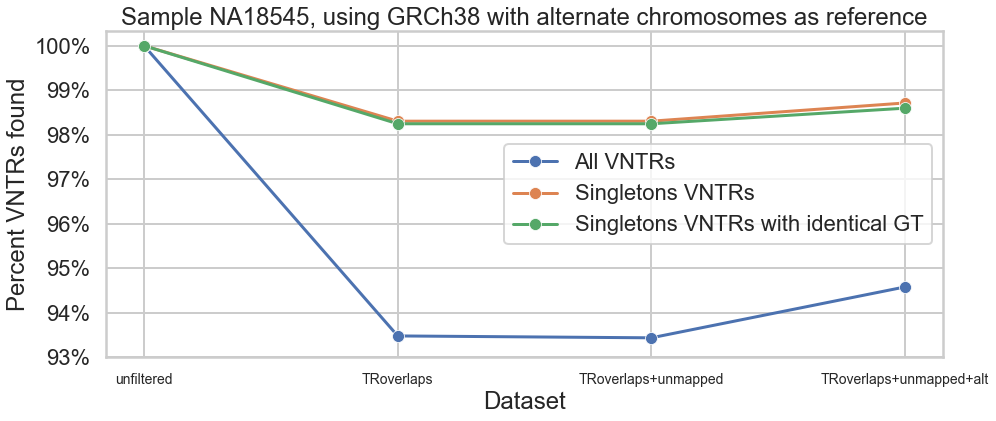

In [61]:
sns.set_context("poster")
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="Dataset", y="Percent VNTRs found", data=plot_data2, ci=None, marker='o',label="All VNTRs")
sns.lineplot(x="Dataset", y="Percent singleton VNTRs found", data=plot_data2, ci=None, marker='o',label="Singletons VNTRs")
sns.lineplot(x="Dataset", y="Percent singleton VNTRs found with identical GTs", data=plot_data2, ci=None, marker='o',label="Singletons VNTRs with identical GT")
ax.set_title("Sample NA18545, using GRCh38 with alternate chromosomes as reference")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.yticks(np.arange(round(min(plot_data2["Percent VNTRs found"])),100.5 , 1)) #round(max(plot_data["Percent singleton VNTRs found"]))+1
ax.legend(ncol=1, loc="right", frameon=True)

#sns.set_theme(style="whitegrid")
#sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 2.5})
plt.setp(ax.get_xticklabels(), fontsize=14) #, horizontalalignment='right'
#plt.setp(ax.get_yticklabels(), fontsize=15)

Plot percentages of total num VNTRs not detected (if desired uncomment plot data statements three cells above) 

USE __FACETGRID__ to make better visualization

Stack existing dfs above into one df

In [62]:
stacked_plot_graph=pd.concat([plot_data, plot_data2],axis=0)
display(stacked_plot_graph)

,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs
1,NA18545,unfiltered,GRCh38.fa,100.000000,100.000000,100.000000
3,NA18545,TRoverlaps,GRCh38.fa,94.314807,98.477752,98.360656
4,NA18545,TRoverlaps+unmapped,GRCh38.fa,94.272380,98.477752,98.419204
5,NA18545,unfiltered,GRCh38_full_analysis_set_plus_decoy_hla.fa,100.000000,100.000000,100.000000
7,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.480102,98.305085,98.246639
9,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.437765,98.305085,98.246639
10,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,94.580864,98.714202,98.597312


Plot using facetgrid

Fix this data

In [63]:
to_melt=pd.melt(stacked_plot_graph, id_vars=['Genome', 'Dataset', 'ReferenceGenome'], value_vars=['Percent VNTRs found', 'Percent singleton VNTRs found', 'Percent singleton VNTRs found with identical GTs'],
var_name='Percent Type', value_name='Percent')
display(to_melt)

,Genome,Dataset,ReferenceGenome,Percent Type,Percent
0,NA18545,unfiltered,GRCh38.fa,Percent VNTRs found,100.000000
1,NA18545,TRoverlaps,GRCh38.fa,Percent VNTRs found,94.314807
2,NA18545,TRoverlaps+unmapped,GRCh38.fa,Percent VNTRs found,94.272380
3,NA18545,unfiltered,GRCh38_full_analysis_set_plus_decoy_hla.fa,Percent VNTRs found,100.000000
4,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,Percent VNTRs found,93.480102
5,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,Percent VNTRs found,93.437765
6,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,Percent VNTRs found,94.580864
7,NA18545,unfiltered,GRCh38.fa,Percent singleton VNTRs found,100.000000
8,NA18545,TRoverlaps,GRCh38.fa,Percent singleton VNTRs found,98.477752
9,NA18545,TRoverlaps+unmapped,GRCh38.fa,Percent singleton VNTRs found,98.477752


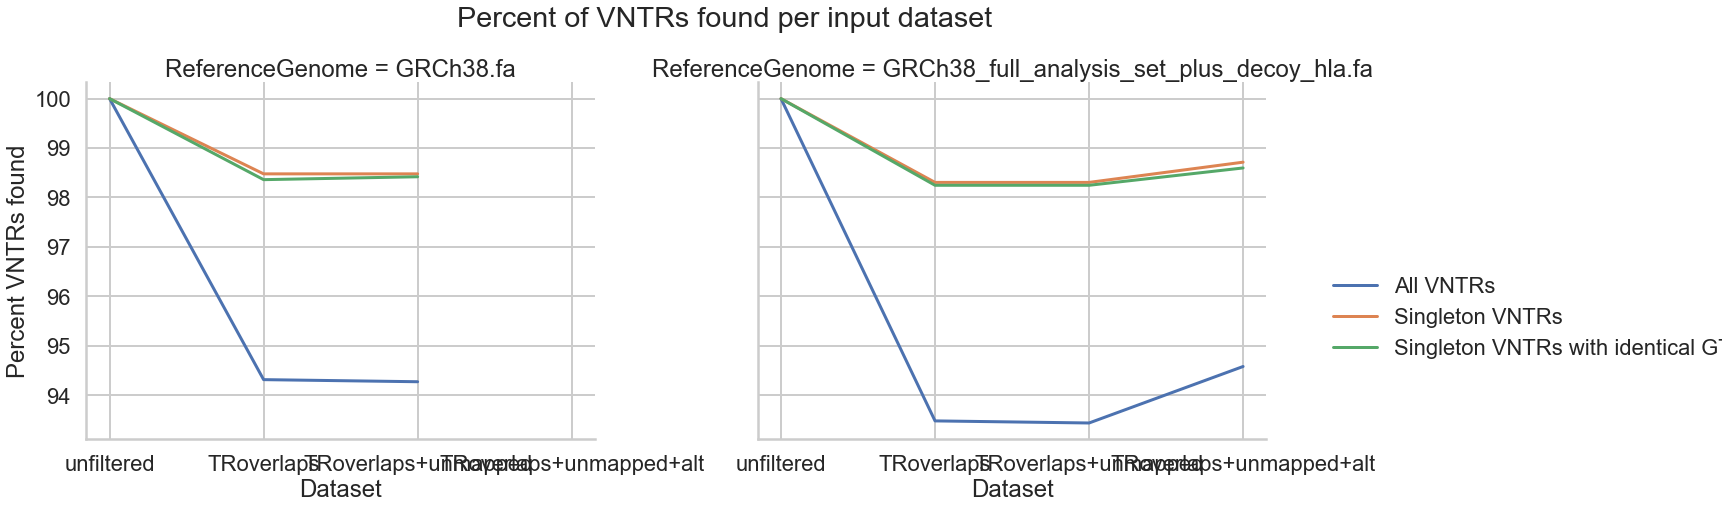

In [64]:
#sns.set_theme()
g = sns.relplot(data=to_melt, x="Dataset", y="Percent", col="ReferenceGenome", kind="line", hue="Percent Type", height=7, aspect=1.3, legend="auto")
g.set_axis_labels("Dataset", "Percent VNTRs found")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))##doesn't work but need to get percent on y axis

#FORMAT LEGEND
g._legend.set_title("") #gets rid of title
g._legend.texts[0].set_text("All VNTRs")
g._legend.texts[1].set_text("Singleton VNTRs")
g._legend.texts[2].set_text("Singleton VNTRs with identical GT")
##shift location of legend box more to the left
g._legend.set_bbox_to_anchor([0.7, 0.5])  # coordinates of lower left of bounding box
g._legend._loc = 2  # if required you can set the loc

#Set supertitle for whole figure
g.fig.suptitle("Percent of VNTRs found per input dataset", x=0.4) #, fontsize=30, y=1.1, x=0.45)
plt.setp(ax.get_xticklabels(), fontsize=14, horizontalalignment='right')
plt.subplots_adjust(top=0.83)

Try with dexplot

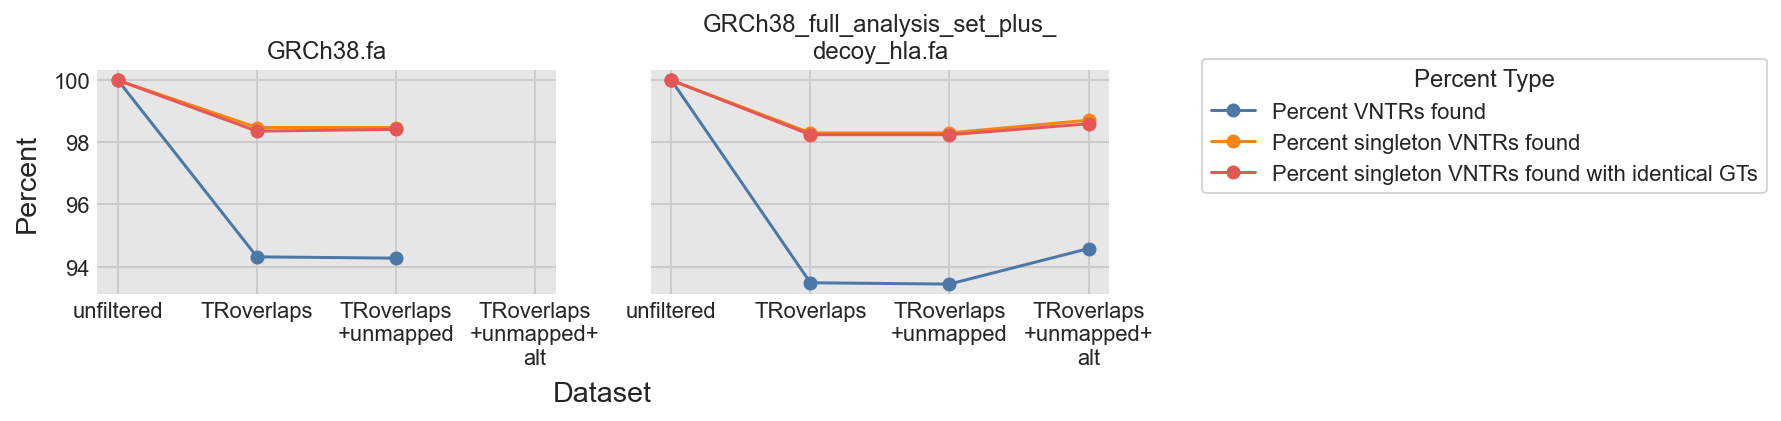

In [65]:
sns.set_context('notebook')
dxp.line(x='Dataset', y='Percent', data=to_melt, aggfunc='median',split='Percent Type', x_order=['unfiltered', 'TRoverlaps', 'TRoverlaps+unmapped', 'TRoverlaps+unmapped+alt'], col='ReferenceGenome')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

#### Percent of Original Time Taken

__One plot for both reference genomes used__ use legend

Just add to plot_data df for bwa_NA18545 and plot_data2 for db_NA18545

In [66]:
fulltime = bwa_NA18545.loc[bwa_NA18545['Dataset']=='unfiltered','CPU_minutes'].values[0]
plot_data['Percent of total time taken']= bwa_NA18545['CPU_minutes'].map(lambda n:get_percentage(round(n),round(fulltime)))
display(bwa_NA18545)
display(plot_data)

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,8352.7,789526334.0,2357.0,2357.0,2357.0,0.0,1708.0,1708.0,-1.0,1708.0,0.0,0.0,1708.0
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,788.6,15779667.0,2235.0,2223.0,2148.0,75.0,1686.0,1682.0,4.0,1674.0,8.0,2.0,1680.0
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,1098.2,17825931.0,2238.0,2222.0,2156.0,66.0,1685.0,1682.0,3.0,1675.0,7.0,1.0,1681.0


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs,Percent of total time taken
1,NA18545,unfiltered,GRCh38.fa,100.000000,100.000000,100.000000,100.000000
3,NA18545,TRoverlaps,GRCh38.fa,94.314807,98.477752,98.360656,9.445708
4,NA18545,TRoverlaps+unmapped,GRCh38.fa,94.272380,98.477752,98.419204,13.144978


In [67]:
fulltime = db_NA18545.loc[db_NA18545['Dataset']=='unfiltered','CPU_minutes'].values[0]
plot_data2['Percent of total time taken']= db_NA18545['CPU_minutes'].map(lambda n:get_percentage(round(n),round(fulltime)))
display(db_NA18545)
display(plot_data2)

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9240.7,789526334.0,2362.0,2362.0,2362.0,0.0,1711.0,1711.0,-1.0,1711.0,0.0,0.0,1711.0
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,833.3,14810544.0,2214.0,2208.0,2144.0,64.0,1682.0,1682.0,0.0,1678.0,4.0,1.0,1681.0
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,929.5,15684155.0,2217.0,2207.0,2146.0,61.0,1682.0,1682.0,0.0,1677.0,5.0,1.0,1681.0
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,1393.8,27048435.0,2244.0,2234.0,2171.0,63.0,1689.0,1689.0,0.0,1681.0,8.0,2.0,1687.0


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs,Percent of total time taken
5,NA18545,unfiltered,GRCh38_full_analysis_set_plus_decoy_hla.fa,100.000000,100.000000,100.000000,100.000000
7,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.480102,98.305085,98.246639,9.014176
9,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.437765,98.305085,98.246639,10.063846
10,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,94.580864,98.714202,98.597312,15.084948


Now plot

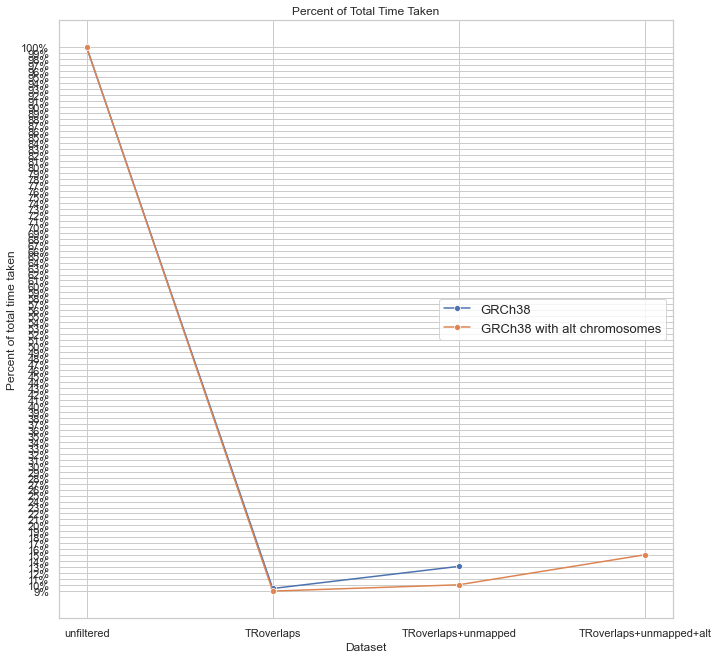

In [68]:
f, ax = plt.subplots(figsize=(11, 11))
sns.lineplot(x="Dataset", y="Percent of total time taken", data=plot_data, ci=None, marker='o',label="GRCh38")
sns.lineplot(x="Dataset", y="Percent of total time taken", data=plot_data2, ci=None, marker='o',label="GRCh38 with alt chromosomes")
ax.set_title("Percent of Total Time Taken")
# plt.xlabel("Dataset") #fontsize=15
# plt.ylabel("Percent VNTRs found") #, fontsize=15
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.yticks(np.arange(round(min(plot_data['Percent of total time taken'])),100.5 , 1)) #round(max(plot_data["Percent singleton VNTRs found"]))+1
ax.legend(ncol=1, loc="right", frameon=True, fontsize=13) #, fontsize=12

#sns.set_theme() ##to reset
sns.set_context("poster") #I used custom settings
# sns.set_theme(style="whitegrid")
# sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 2.5})
# plt.setp(ax.get_xticklabels(), fontsize=14, horizontalalignment='right')
# plt.setp(ax.get_yticklabels(), fontsize=15)

Since plotting with full as a datapoint is too large of a scale, don't include, just take a slice from df

In [69]:
plot_data_graph=plot_data[plot_data.Dataset !="unfiltered"]
plot_data_graph2=plot_data2[plot_data2.Dataset!="unfiltered"]
plot_data_graph.head()
#plot_data_graph2.head()

,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs,Percent of total time taken
3,NA18545,TRoverlaps,GRCh38.fa,94.314807,98.477752,98.360656,9.445708
4,NA18545,TRoverlaps+unmapped,GRCh38.fa,94.272380,98.477752,98.419204,13.144978


Replot

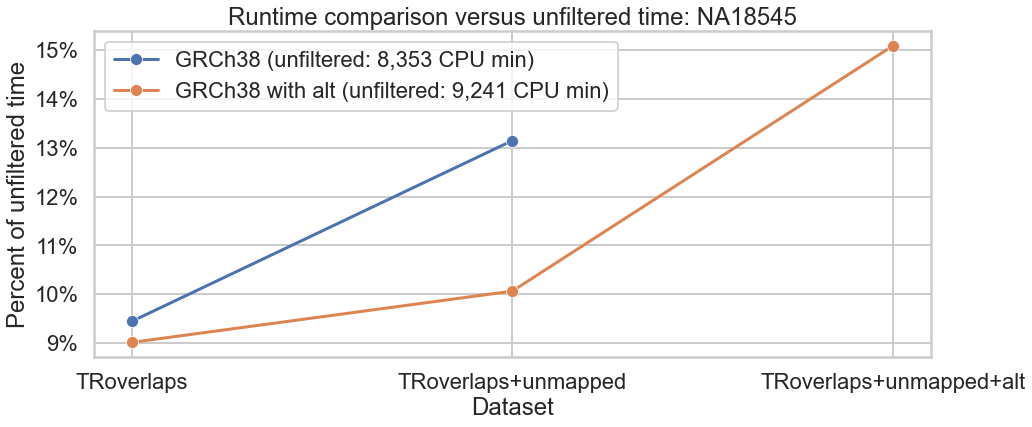

In [70]:
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="Dataset", y="Percent of total time taken", data=plot_data_graph, ci=None, marker='o',label="GRCh38 (unfiltered: 8,353 CPU min)")
sns.lineplot(x="Dataset", y="Percent of total time taken", data=plot_data_graph2, ci=None, marker='o',label="GRCh38 with alt (unfiltered: 9,241 CPU min)")
ax.set_title("Runtime comparison versus unfiltered time: NA18545")
# plt.xlabel("Dataset") #fontsize=15
plt.ylabel("Percent of unfiltered time") #, fontsize=15
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.yticks(np.arange(round(min(plot_data_graph['Percent of total time taken'])),round(max(plot_data_graph2['Percent of total time taken']))+1, 1)) 
ax.legend(ncol=1, loc="upper left", frameon=True) #, fontsize=12

#sns.set_theme() ##to reset
sns.set_context("poster") #or used custom settings
# sns.set_theme(style="whitegrid")
# sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 2.5})
#plt.setp(ax.get_xticklabels(), horizontalalignment='right') #fontsize=14, 
# plt.setp(ax.get_yticklabels(), fontsize=15)

#### Percent of Total reads

Plot and subset data the same way as above

Subset for each ref genome used

In [71]:
fullreads = bwa_NA18545.loc[bwa_NA18545['Dataset']=='unfiltered','numreads'].values[0]
plot_data['Percent of total reads']= bwa_NA18545['numreads'].map(lambda n:get_percentage(round(n),round(fullreads)))
display(bwa_NA18545)
display(plot_data)

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,8352.7,789526334.0,2357.0,2357.0,2357.0,0.0,1708.0,1708.0,-1.0,1708.0,0.0,0.0,1708.0
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,788.6,15779667.0,2235.0,2223.0,2148.0,75.0,1686.0,1682.0,4.0,1674.0,8.0,2.0,1680.0
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,1098.2,17825931.0,2238.0,2222.0,2156.0,66.0,1685.0,1682.0,3.0,1675.0,7.0,1.0,1681.0


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs,Percent of total time taken,Percent of total reads
1,NA18545,unfiltered,GRCh38.fa,100.000000,100.000000,100.000000,100.000000,100.000000
3,NA18545,TRoverlaps,GRCh38.fa,94.314807,98.477752,98.360656,9.445708,1.998625
4,NA18545,TRoverlaps+unmapped,GRCh38.fa,94.272380,98.477752,98.419204,13.144978,2.257801


In [72]:
fullreads = db_NA18545.loc[db_NA18545['Dataset']=='unfiltered','numreads'].values[0]
plot_data2['Percent of total reads']= db_NA18545['numreads'].map(lambda n:get_percentage(round(n),round(fullreads)))
display(db_NA18545)
display(plot_data2)

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9240.7,789526334.0,2362.0,2362.0,2362.0,0.0,1711.0,1711.0,-1.0,1711.0,0.0,0.0,1711.0
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,833.3,14810544.0,2214.0,2208.0,2144.0,64.0,1682.0,1682.0,0.0,1678.0,4.0,1.0,1681.0
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,929.5,15684155.0,2217.0,2207.0,2146.0,61.0,1682.0,1682.0,0.0,1677.0,5.0,1.0,1681.0
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,1393.8,27048435.0,2244.0,2234.0,2171.0,63.0,1689.0,1689.0,0.0,1681.0,8.0,2.0,1687.0


,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs,Percent of total time taken,Percent of total reads
5,NA18545,unfiltered,GRCh38_full_analysis_set_plus_decoy_hla.fa,100.000000,100.000000,100.000000,100.000000,100.000000
7,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.480102,98.305085,98.246639,9.014176,1.875877
9,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.437765,98.305085,98.246639,10.063846,1.986527
10,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,94.580864,98.714202,98.597312,15.084948,3.425907


Don't plot full values - scale is to large

In [73]:
plot_data_graph=plot_data[plot_data.Dataset !="unfiltered"]
plot_data_graph2=plot_data2[plot_data2.Dataset!="unfiltered"]
#plot_data_graph.head()
plot_data_graph2.head()

,Genome,Dataset,ReferenceGenome,Percent VNTRs found,Percent singleton VNTRs found,Percent singleton VNTRs found with identical GTs,Percent of total time taken,Percent of total reads
7,NA18545,TRoverlaps,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.480102,98.305085,98.246639,9.014176,1.875877
9,NA18545,TRoverlaps+unmapped,GRCh38_full_analysis_set_plus_decoy_hla.fa,93.437765,98.305085,98.246639,10.063846,1.986527
10,NA18545,TRoverlaps+unmapped+alt,GRCh38_full_analysis_set_plus_decoy_hla.fa,94.580864,98.714202,98.597312,15.084948,3.425907


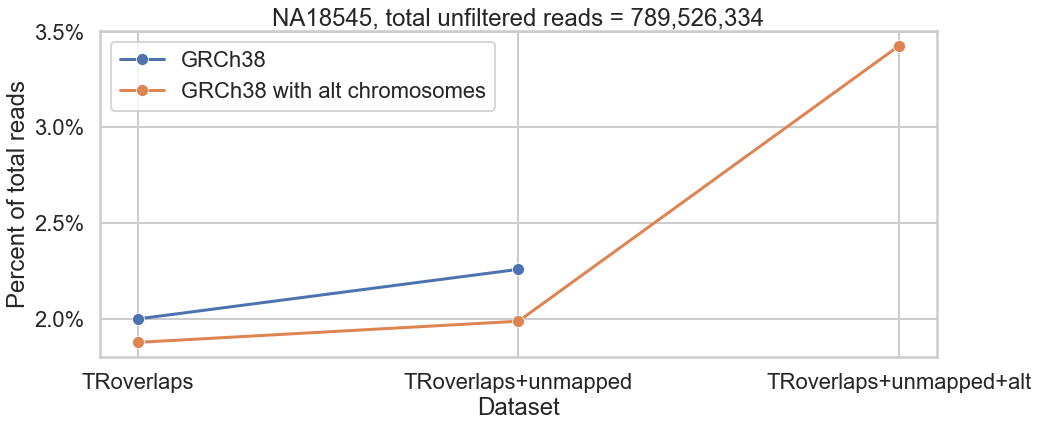

In [74]:
f, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x="Dataset", y="Percent of total reads", data=plot_data_graph, ci=None, marker='o',label="GRCh38")
sns.lineplot(x="Dataset", y="Percent of total reads", data=plot_data_graph2, ci=None, marker='o',label="GRCh38 with alt chromosomes")
ax.set_title("NA18545, total unfiltered reads = 789,526,334")
# plt.xlabel("Dataset") #fontsize=15
#plt.ylabel("Percent") #, fontsize=15
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=1))
plt.yticks(np.arange(round(min(plot_data_graph2['Percent of total reads'])),round(max(plot_data_graph2['Percent of total reads']))+1, 0.5)) 
ax.legend(ncol=1, loc="upper left", frameon=True) #, fontsize=12

#sns.set_theme() ##to reset
#sns.set_context("poster"/notebook/talk) - I used custom settings
sns.set_theme(style="whitegrid")
sns.set_context("poster")
# sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 2.5})
#plt.setp(ax.get_xticklabels(), horizontalalignment='right')#fontsize=14, 
# plt.setp(ax.get_yticklabels(), fontsize=15)

#### Number of VNTRs detected through 3 unfiltered methods (fastq, bam, cram to bam) (table)

Subset

In [78]:
vntrs_detected_full=graph_NA18545[graph_NA18545.Dataset == 'unfiltered']
display(vntrs_detected_full)

,Genome,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRs_py,numVNTRsmatching,numVNTRsmatching_identical,numVNTRsmatching_nonidentical,numsingletons,numsingletonsmatching,numsingletonsmissingfromfull,singletonsmatching_identical,singletonsmatching_nonidentical,singletonsmatching_nonidentical_changedgt,numsingletonsmatching_identicalgt
0,NA18545,Fastq,-1,unfiltered,9428.9,789526334.0,2366.0,2366.0,2366.0,0.0,1710.0,1710.0,-1.0,1710.0,0.0,0.0,1710.0
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,8352.7,789526334.0,2357.0,2357.0,2357.0,0.0,1708.0,1708.0,-1.0,1708.0,0.0,0.0,1708.0
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9240.7,789526334.0,2362.0,2362.0,2362.0,0.0,1711.0,1711.0,-1.0,1711.0,0.0,0.0,1711.0


Plot

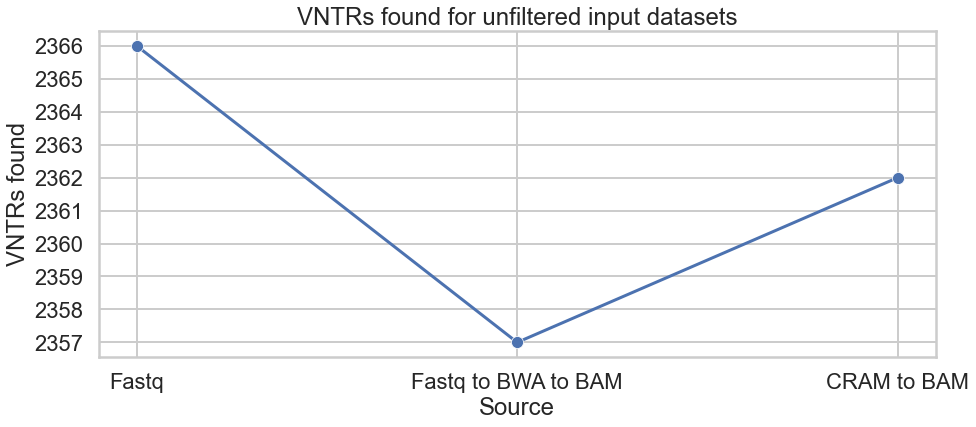

In [76]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x="Source", y="numVNTRs_py", data=vntrs_detected_full, ci=None, marker='o')
ax.set_title("VNTRs found for unfiltered input datasets")
# plt.xlabel("Dataset") #fontsize=15
plt.ylabel("VNTRs found") #, fontsize=15

plt.yticks(np.arange(min(vntrs_detected_full.numVNTRs_py), max(vntrs_detected_full.numVNTRs_py)+1, 1))

#sns.set_theme() ##to reset
sns.set_theme(style="whitegrid")
sns.set_context("poster")
# sns.set_context("notebook", font_scale=1.75, rc={"lines.linewidth": 2.5})
# plt.setp(ax.get_xticklabels(), fontsize=14, horizontalalignment='center')
# plt.setp(ax.get_yticklabels(), fontsize=15)

__Make a table of all graphing info I plotted__

In [77]:
viewed_data_NA18545= pd.concat([master_NA18545.Source, master_NA18545.ReferenceGenome, master_NA18545.Dataset, master_NA18545.CPU_minutes, master_NA18545.numreads, master_NA18545.numVNTRsmatching,master_NA18545.numsingletonsmatching, master_NA18545.numsingletonsmatching_identicalgt],axis=1) 
display(viewed_data_NA18545)
##DON'T uncomment, I used this to generate excel file and saved changes as .xlsx file (in BRITE folder)
# viewed_data_NA18545.to_csv("viewed_data_NA18545.csv", index=False)

,Source,ReferenceGenome,Dataset,CPU_minutes,numreads,numVNTRsmatching,numsingletonsmatching,numsingletonsmatching_identicalgt
0,Fastq,-1,unfiltered,9428.9,789526334.0,2366.0,1710.0,1710.0
1,Fastq to BWA to BAM,GRCh38.fa,unfiltered,8352.7,789526334.0,2357.0,1708.0,1708.0
3,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,788.6,15779667.0,2223.0,1682.0,1680.0
4,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,1098.2,17825931.0,2222.0,1682.0,1681.0
5,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,9240.7,789526334.0,2362.0,1711.0,1711.0
7,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,833.3,14810544.0,2208.0,1682.0,1681.0
9,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,929.5,15684155.0,2207.0,1682.0,1681.0
10,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,1393.8,27048435.0,2234.0,1689.0,1687.0


**Reran all restricted read datasets 2 more times so I have 3 trials for each - plot avg times for each with std error bars**

Load csv

In [100]:
runtimes=pd.read_csv("Runtimes.csv", index_col=False)
runtimes.head()

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time
0,NA18545,Fastq,-1,unfiltered,7155775,6:05:34:38,7:34:12,01:03:54:41,6:13:08:51
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,7323341,5:11:19:07,7:53:33,01:16:54:29,5:19:12:41
2,NA18545,Fastq to BWA to BAM,GRCh38.fa,unmapped,7245806,1:49:20,0:01:05,00:00:46:18,1:50:26
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14


Convert CPU_time to Minutes

In [101]:
runtimes['CPU_minutes']=runtimes['CPU_time'].map(lambda time: time_to_minutes(str(time))) #only adds column to dataframe
#display(runtimes)
runtimes.head()

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes
0,NA18545,Fastq,-1,unfiltered,7155775,6:05:34:38,7:34:12,01:03:54:41,6:13:08:51,9428.9
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,7323341,5:11:19:07,7:53:33,01:16:54:29,5:19:12:41,8352.7
2,NA18545,Fastq to BWA to BAM,GRCh38.fa,unmapped,7245806,1:49:20,0:01:05,00:00:46:18,1:50:26,110.4
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37,788.6
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14,1098.2


Split up dataframe by different samples contained - in future make more efficient
 - NA18545 and bwa
 - NA18545 and db
 - HG00096 and db

In [111]:
runtimes_NA18545_bwa= runtimes.query('Genome == "NA18545" and ReferenceGenome =="GRCh38.fa"', inplace = False).copy()
runtimes_NA18545_bwa.head()

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,7323341,5:11:19:07,7:53:33,01:16:54:29,5:19:12:41,8352.7
2,NA18545,Fastq to BWA to BAM,GRCh38.fa,unmapped,7245806,1:49:20,0:01:05,00:00:46:18,1:50:26,110.4
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37,788.6
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14,1098.2
18,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,8206692,10:05:38,4:02:56,6:11:21,14:08:34,848.6


In [112]:
runtimes_NA18545_db= runtimes.query('Genome == "NA18545" and ReferenceGenome !="GRCh38.fa" and ReferenceGenome !="-1"', inplace = False).copy()
runtimes_NA18545_db.head()

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,7383482,6:02:34:35,7:26:05,01:00:51:06,6:10:00:40,9240.7
6,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unmapped,7526439,1:38:11,0:00:26,00:00:58:30,01:38:38,98.6
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,7784537,9:39:33,4:13:46,05:19:48,13:53:20,833.3
8,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,alt,8176557,5:37:27,0:03:19,1:13:57,5:40:47,340.8
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,7784541,11:20:58,4:08:33,6:16:29,15:29:32,929.5


In [113]:
runtimes_HG00096_db= runtimes.query('Genome == "HG00096" and ReferenceGenome !="GRCh38.fa" and ReferenceGenome !="-1"', inplace = False).copy()
runtimes_HG00096_db.head()

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes
12,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,7624685,6:02:00:56,7:10:24,01:02:53:47,6:09:11:21,9191.4
13,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unmapped,7549112,01:45:24,0:00:33,1:03:26,01:45:57,106.0
14,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,7789674,9:32:34,3:58:14,05:22:40,13:30:49,810.8
15,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,alt,8176571,5:31:20,00:02:54,01:11:38,5:34:15,334.2
16,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,7789675,10:53:13,4:42:55,7:14:51,15:36:09,936.1


Now calculate percent of total time taken for each three subsets

In [114]:
fulltime = runtimes_NA18545_bwa.loc[(runtimes_NA18545_bwa['Dataset']=='unfiltered'),'CPU_minutes'].values[0]
runtimes_NA18545_bwa['Percent of total time taken']= runtimes_NA18545_bwa['CPU_minutes'].map(lambda n:get_percentage(round(n),round(fulltime)))
print(fulltime)
display(runtimes_NA18545_bwa)

8352.7


,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes,Percent of total time taken
1,NA18545,Fastq to BWA to BAM,GRCh38.fa,unfiltered,7323341,5:11:19:07,7:53:33,01:16:54:29,5:19:12:41,8352.7,100.000000
2,NA18545,Fastq to BWA to BAM,GRCh38.fa,unmapped,7245806,1:49:20,0:01:05,00:00:46:18,1:50:26,110.4,1.316892
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37,788.6,9.445708
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14,1098.2,13.144978
18,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,8206692,10:05:38,4:02:56,6:11:21,14:08:34,848.6,10.164013
19,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,8206695,10:06:02,4:03:25,6:12:26,14:09:28,849.5,10.175985
20,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,8206698,11:50:44,3:29:44,6:15:53,15:20:28,920.5,11.014007
21,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,8210971,12:16:10,3:51:58,6:27:19,16:08:09,968.1,11.588651


In [115]:
fulltime = runtimes_NA18545_db.loc[(runtimes_NA18545_db['Dataset']=='unfiltered'),'CPU_minutes'].values[0]
runtimes_NA18545_db['Percent of total time taken']= runtimes_NA18545_db['CPU_minutes'].map(lambda n:get_percentage(round(n),round(fulltime)))
print(fulltime)
display(runtimes_NA18545_db)

9240.7


,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes,Percent of total time taken
5,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,7383482,6:02:34:35,7:26:05,01:00:51:06,6:10:00:40,9240.7,100.000000
6,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unmapped,7526439,1:38:11,0:00:26,00:00:58:30,01:38:38,98.6,1.071313
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,7784537,9:39:33,4:13:46,05:19:48,13:53:20,833.3,9.014176
8,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,alt,8176557,5:37:27,0:03:19,1:13:57,5:40:47,340.8,3.690077
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,7784541,11:20:58,4:08:33,6:16:29,15:29:32,929.5,10.063846
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,8176561,17:50:07,5:23:38,8:40:20,23:13:45,1393.8,15.084948
22,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8210976,9:23:26,2:13:23,4:19:23,11:36:50,696.8,7.542474
23,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8206546,9:18:55,3:48:30,4:18:55,13:07:25,787.4,8.516394
24,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,8206382,11:16:26,4:31:04,6:41:02,15:47:30,947.5,10.258630
25,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,8206384,11:21:37,4:09:49,5:31:24,15:31:26,931.4,10.074667


In [116]:
fulltime = runtimes_HG00096_db.loc[(runtimes_HG00096_db['Dataset']=='unfiltered'),'CPU_minutes'].values[0]
runtimes_HG00096_db['Percent of total time taken']= runtimes_HG00096_db['CPU_minutes'].map(lambda n:get_percentage(round(n),round(fulltime)))
print(fulltime)
display(runtimes_HG00096_db)

9191.4


,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes,Percent of total time taken
12,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unfiltered,7624685,6:02:00:56,7:10:24,01:02:53:47,6:09:11:21,9191.4,100.000000
13,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,unmapped,7549112,01:45:24,0:00:33,1:03:26,01:45:57,106.0,1.153302
14,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,7789674,9:32:34,3:58:14,05:22:40,13:30:49,810.8,8.823849
15,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,alt,8176571,5:31:20,00:02:54,01:11:38,5:34:15,334.2,3.633990
16,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,7789675,10:53:13,4:42:55,7:14:51,15:36:09,936.1,10.183876
17,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,8176575,17:30:13,4:00:48,8:49:37,21:31:02,1291.0,14.046350
28,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8206565,9:30:15,3:43:21,4:48:32,13:13:36,793.6,8.638886
29,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8210981,9:23:25,4:24:46,5:22:54,13:48:12,828.2,9.008813
30,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,8206359,11:49:45,4:14:23,9:30:56,16:04:08,964.1,10.488521
31,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,8206368,11:22:46,3:39:54,5:30:23,15:02:40,902.7,9.824829


Now stack these separate dfs (don't have to I just want to)

In [119]:
runtimes_percents=pd.concat([runtimes_NA18545_bwa, runtimes_NA18545_db, runtimes_HG00096_db], axis=0)
#display(runtimes_percents)

**3 Plots with averaged data**  
1. NA18545 data only
2. HG00096 data only
3. All data (NA18545 + HG00096)

1. Plot averaged values for only NA18545 data

Subset data I'm plotting (used new query method)

In [187]:
refined_subset=runtimes_percents.query('Genome == "NA18545" and Dataset !="unfiltered" and Dataset !="unmapped" and Dataset !="alt"', inplace = False)
display(refined_subset)

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes,Percent of total time taken
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37,788.6,9.445708
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14,1098.2,13.144978
18,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,8206692,10:05:38,4:02:56,6:11:21,14:08:34,848.6,10.164013
19,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,8206695,10:06:02,4:03:25,6:12:26,14:09:28,849.5,10.175985
20,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,8206698,11:50:44,3:29:44,6:15:53,15:20:28,920.5,11.014007
21,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,8210971,12:16:10,3:51:58,6:27:19,16:08:09,968.1,11.588651
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,7784537,9:39:33,4:13:46,05:19:48,13:53:20,833.3,9.014176
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,7784541,11:20:58,4:08:33,6:16:29,15:29:32,929.5,10.063846
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,8176561,17:50:07,5:23:38,8:40:20,23:13:45,1393.8,15.084948
22,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8210976,9:23:26,2:13:23,4:19:23,11:36:50,696.8,7.542474


Plot

Text(0, 0.5, 'Percent of unfiltered time')

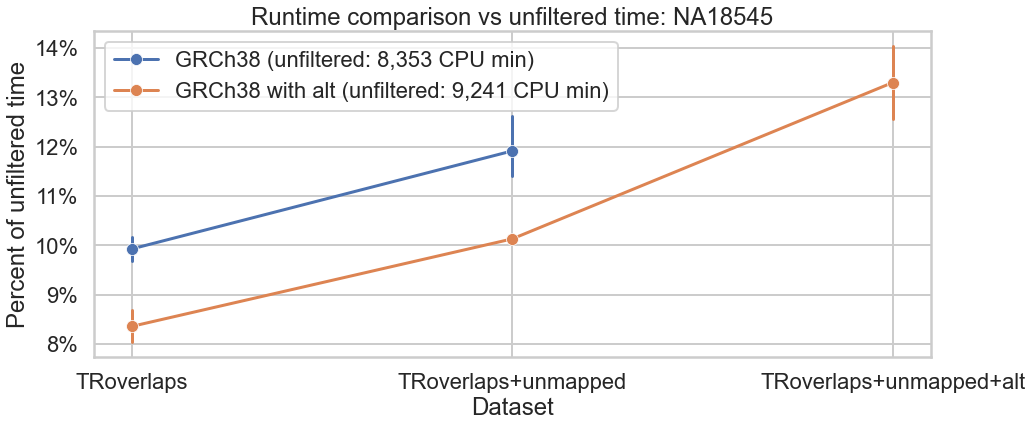

In [188]:
#refined_subset.columns =[column.replace(" ", "_") for column in runtimes_percents.columns]
f, ax = plt.subplots(figsize=(15, 6))
g=sns.lineplot(data=refined_subset, x="Dataset", y="Percent of total time taken", hue="ReferenceGenome", err_style="bars", ci=68, marker='o')
ax.legend(labels=['GRCh38 (unfiltered: 8,353 CPU min)','GRCh38 with alt (unfiltered: 9,241 CPU min)' ])
#ax.legend().set_title('') ##don't know why it doesn't show up, but line above only works if this is commented out
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
#plt.yticks(np.arange(round(min(refined_subset['Percent of total time taken']))-1,round(max(refined_subset['Percent of total time taken']))+1, 1)) 

ax.set_title("Runtime comparison vs unfiltered time: NA18545")
# plt.xlabel("Dataset") #fontsize=15
plt.ylabel("Percent of unfiltered time") #, fontsize=15
#plt.yticks(np.arange(min(vntrs_detected_full.numVNTRs_py), max(vntrs_detected_full.numVNTRs_py)+1, 1))
# sns.set_theme(style="whitegrid")
# sns.set_context("poster")

2. Plot averaged values for only HG00096 (does it look like NA18545?)

Subset data

In [185]:
refined_subset=runtimes_percents.query('Genome == "HG00096" and Dataset !="unfiltered" and Dataset !="unmapped" and Dataset !="alt"', inplace = False)
display(refined_subset)

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes,Percent of total time taken
14,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,7789674,9:32:34,3:58:14,05:22:40,13:30:49,810.8,8.823849
16,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,7789675,10:53:13,4:42:55,7:14:51,15:36:09,936.1,10.183876
17,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,8176575,17:30:13,4:00:48,8:49:37,21:31:02,1291.0,14.046350
28,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8206565,9:30:15,3:43:21,4:48:32,13:13:36,793.6,8.638886
29,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8210981,9:23:25,4:24:46,5:22:54,13:48:12,828.2,9.008813
30,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,8206359,11:49:45,4:14:23,9:30:56,16:04:08,964.1,10.488521
31,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,8206368,11:22:46,3:39:54,5:30:23,15:02:40,902.7,9.824829
32,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,8206204,16:44:49,3:52:57,6:12:22,20:37:46,1237.8,13.469699
33,HG00096,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,8206206,15:57:05,4:26:01,6:40:30,20:23:07,1223.1,13.306495


Plot

Text(0, 0.5, 'Percent of unfiltered time')

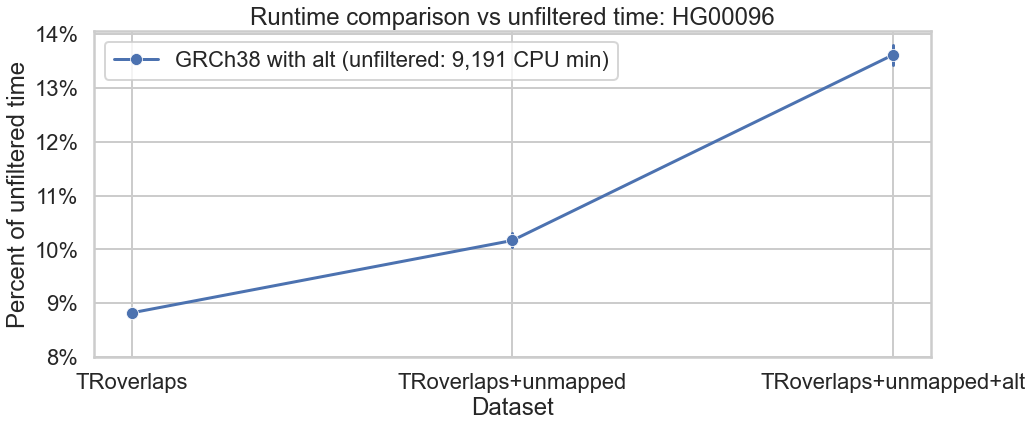

In [186]:
f, ax = plt.subplots(figsize=(15, 6))
g=sns.lineplot(data=refined_subset, x="Dataset", y="Percent of total time taken", hue="ReferenceGenome", err_style="bars", ci=68, marker='o')
ax.legend(labels=['GRCh38 with alt (unfiltered: 9,191 CPU min)'])
#ax.legend().set_title('') ##don't know why it doesn't show up, but line above only works if this is commented out
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.yticks(np.arange(round(min(refined_subset['Percent of total time taken']))-1,round(max(refined_subset['Percent of total time taken']))+1, 1)) 

ax.set_title("Runtime comparison vs unfiltered time: HG00096")
# plt.xlabel("Dataset") #fontsize=15
plt.ylabel("Percent of unfiltered time") #, fontsize=15
#plt.yticks(np.arange(min(vntrs_detected_full.numVNTRs_py), max(vntrs_detected_full.numVNTRs_py)+1, 1))
# sns.set_theme(style="whitegrid")
# sns.set_context("poster")

3. Plot averaged values for all data (NA18545 and HG00096)

Subset

In [182]:
refined_subset=runtimes_percents.query('Dataset !="unfiltered" and Dataset !="unmapped" and Dataset !="alt"', inplace = False)
display(refined_subset)

,Genome,Source,ReferenceGenome,Dataset,Job Number,User Time,System Time,Runtime -Wallclock,CPU_time,CPU_minutes,Percent of total time taken
3,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,7323126,10:00:44,3:07:53,01:10:52:14,13:08:37,788.6,9.445708
4,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,7323127,12:11:46,06:06:27,01:11:58:26,18:18:14,1098.2,13.144978
18,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,8206692,10:05:38,4:02:56,6:11:21,14:08:34,848.6,10.164013
19,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps,8206695,10:06:02,4:03:25,6:12:26,14:09:28,849.5,10.175985
20,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,8206698,11:50:44,3:29:44,6:15:53,15:20:28,920.5,11.014007
21,NA18545,Fastq to BWA to BAM,GRCh38.fa,TRoverlaps+unmapped,8210971,12:16:10,3:51:58,6:27:19,16:08:09,968.1,11.588651
7,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,7784537,9:39:33,4:13:46,05:19:48,13:53:20,833.3,9.014176
9,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped,7784541,11:20:58,4:08:33,6:16:29,15:29:32,929.5,10.063846
10,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps+unmapped+alt,8176561,17:50:07,5:23:38,8:40:20,23:13:45,1393.8,15.084948
22,NA18545,CRAM to BAM,GRCh38_full_analysis_set_plus_decoy_hla.fa,TRoverlaps,8210976,9:23:26,2:13:23,4:19:23,11:36:50,696.8,7.542474


Plot

([<matplotlib.axis.YTick at 0x7fce7f37f7f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

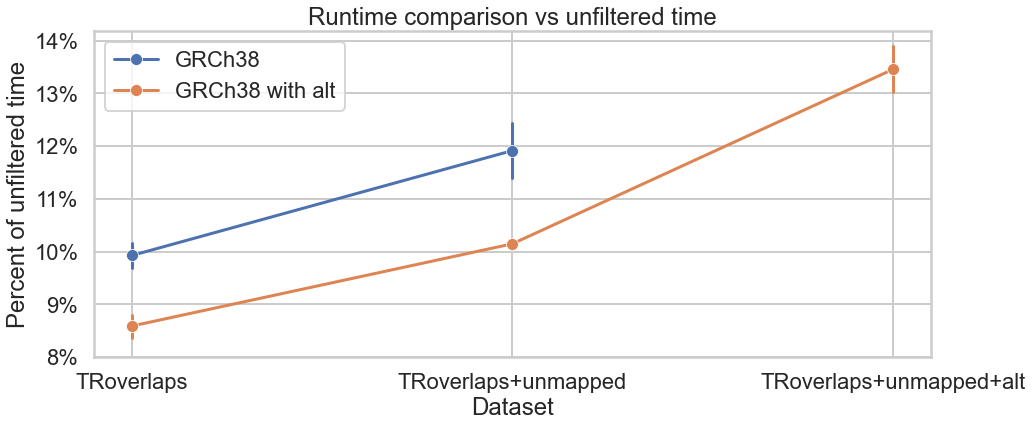

In [183]:
#refined_subset.columns =[column.replace(" ", "_") for column in runtimes_percents.columns]
f, ax = plt.subplots(figsize=(15, 6))
g=sns.lineplot(data=refined_subset, x="Dataset", y="Percent of total time taken", hue="ReferenceGenome", err_style="bars", ci=68, marker='o')

ax.set_title("Runtime comparison vs unfiltered time")
# plt.xlabel("Dataset") #fontsize=15
plt.ylabel("Percent of unfiltered time") #, fontsize=15

##LEGEND titles, totals are NOT applicable (different totals for all sets of data)
ax.legend(labels=['GRCh38','GRCh38 with alt'])
#ax.legend().set_title('')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.yticks(np.arange(round(min(refined_subset['Percent of total time taken'])),round(max(refined_subset['Percent of total time taken'])), 1)) 

# sns.set_theme(style="whitegrid")
# sns.set_context("poster")

Don't use ^^this plot (for consistency's sake - right now all graphs are only for NA18545) but good because the graphs I will be showing is representative of all the data

Could also plot just HG00096 data to see what the numbers are